#6.6: Sourcing & Analyzing Time Series Data

Objective: Conduct time series analysis and investigate data stationarity.

This script contains the following:

## 1. [Import Libraries/Dataframe](#import_libraries)

## 2. [Create a Subset/ Data Wrangling](#subset)

## 3. [Time-Series Analysis: Decomposition](#decomposition)

## 4. [Test for Stationarity](#station)

## 5. [Check for Autocorrelation](#auto)


# 1. Import Libraries/Dataframe<a id='import_libraries'></a>

In [ ]:
#install quandl to Google Collab
!pip install quandl

In [ ]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [ ]:
path = r'/content/drive/MyDrive/Careerfoundary/Section 6_University_Ranking'

In [ ]:
df_data = pd.read_csv(os.path.join(path, '02 Data', 'Original_Data', 'TimeSeriesData.csv'), index_col=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_data.head(2)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005


In [ ]:
df_data.shape

(4897, 11)

In [ ]:
# We are using this dataframe as it includeds more years therefore timeseries can be better analysed.
# The mean world rank for universities will be evaluated overtime.

# 2. Create a Subset/ Data Wrangling<a id='subset'></a>

In [ ]:
# Create a Subset of year and world rank percentage columns
df_sub = df_data[['year','total_score']]

In [ ]:
df_sub.head()

,year,total_score
0,2005,100.0
1,2005,73.6
2,2005,73.4
3,2005,72.8
4,2005,70.1


In [ ]:
# Group by date with the mean of the avg delay
df_sub = df_sub.groupby('year')['total_score'].mean()

In [ ]:
df_sub

,total_score
year,
2005,36.679000
2006,36.431683
2007,36.330693
2008,36.557000
2009,36.311000
2010,36.450000
2011,36.458416
2012,36.400000
2013,36.561224


In [ ]:
data_2 = df_sub.reset_index()

In [ ]:
data_2

,year,total_score
0,2005,36.679000
1,2006,36.431683
2,2007,36.330693
3,2008,36.557000
4,2009,36.311000
5,2010,36.450000
6,2011,36.458416
7,2012,36.400000
8,2013,36.561224
9,2014,36.172000


In [ ]:
df_sub = data_2

In [ ]:
# Assuming 'year' is a column in df_sub
df_sub['datetime'] = pd.to_datetime(df_sub['year'], format='%Y')  # Convert 'year' to datetime format with only the year
df_sub = df_sub.set_index(df_sub['datetime'].dt.year)  # Set the index as just the year (integer)
df_sub.drop(['year', 'datetime'], axis=1, inplace=True)  # Drop the original 'year' and 'datetime' columns

df_sub.head(15)

,total_score
datetime,
2005,36.679000
2006,36.431683
2007,36.330693
2008,36.557000
2009,36.311000
2010,36.450000
2011,36.458416
2012,36.400000
2013,36.561224


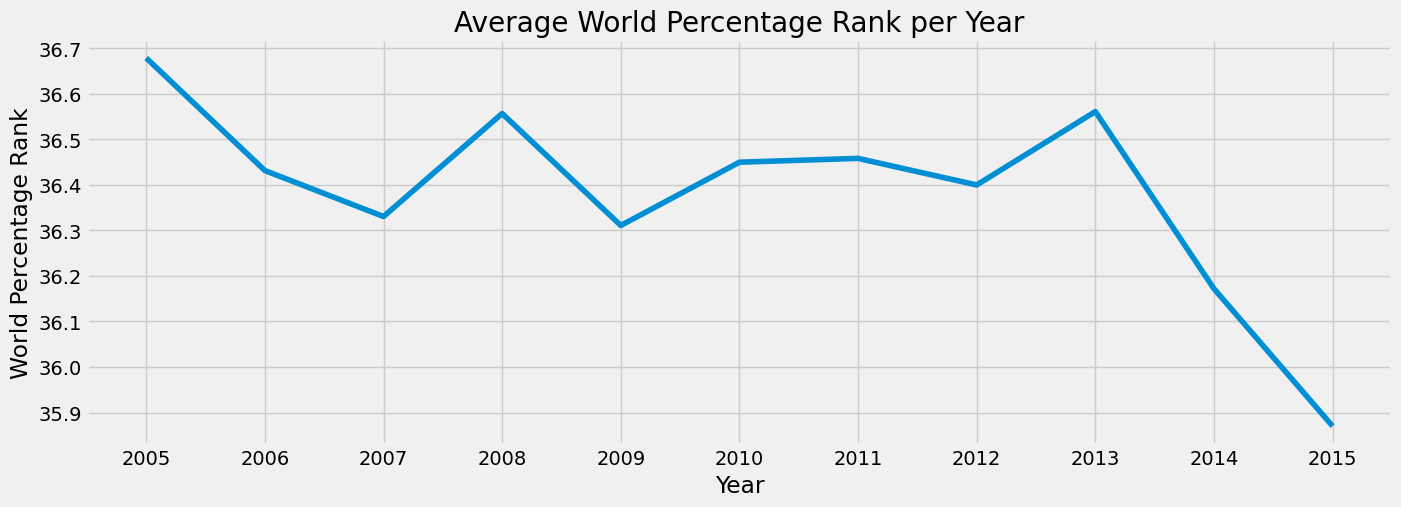

In [ ]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

# Set x-ticks to be the years (ensuring they are integers)
plt.xticks(df_sub.index, df_sub.index.astype(int))

# Labeling the axes and setting a title if needed
plt.xlabel('Year')
plt.ylabel('World Percentage Rank')
plt.title('Average University Score between 2005 - 2015')

# Show the plot
plt.show()


In [ ]:
# Check for missing value, there are no missing values
df_sub.isnull().sum()

,0
total_score,0


In [ ]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()

# No duplicates

0

# 3. Time-series analysis: decomposition<a id='decomposition'></a>

In [ ]:
# Decompose the time series with a manually specified period of 1
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive', period=1)

In [ ]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

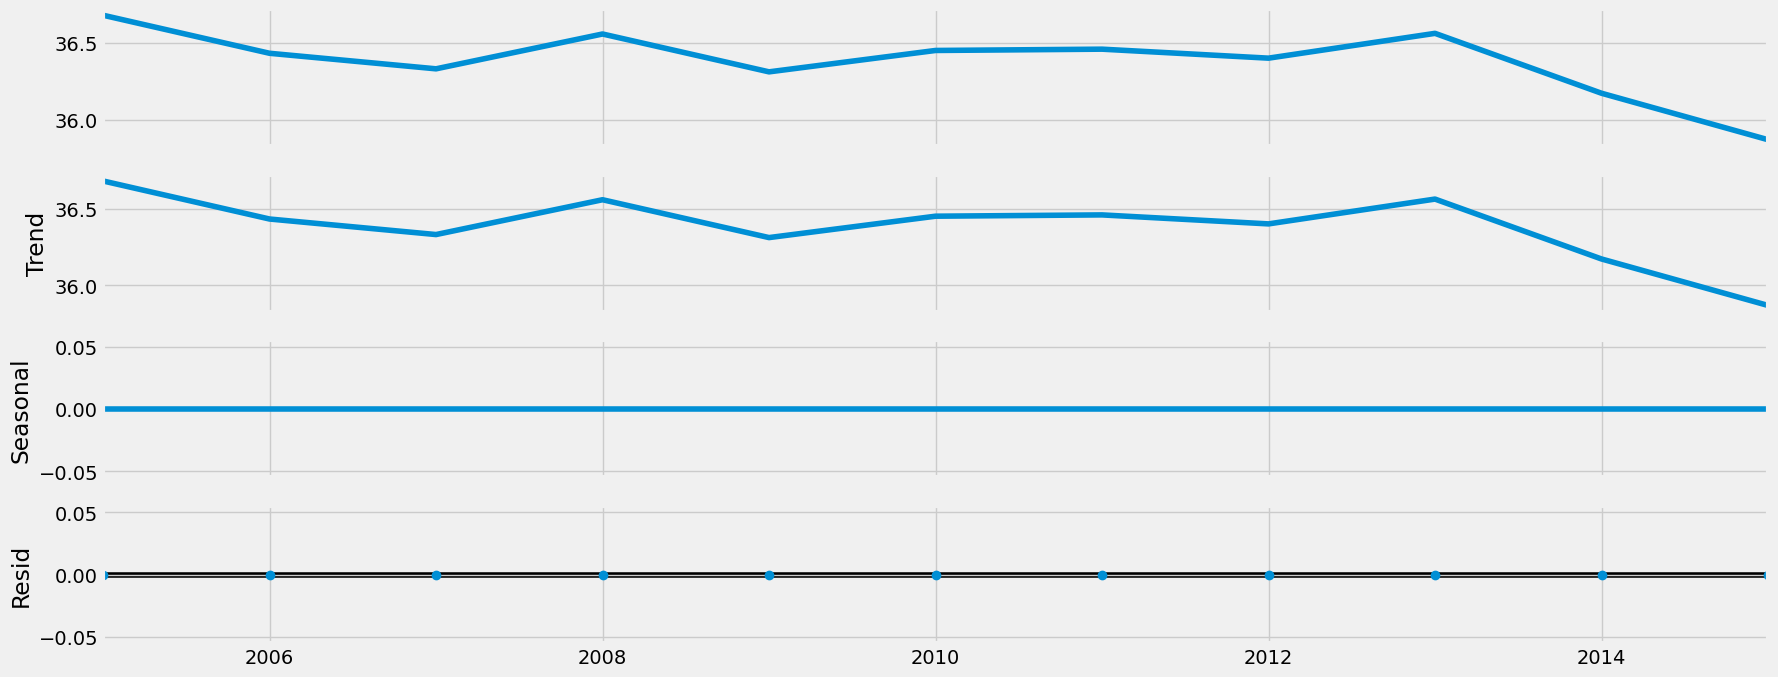

In [ ]:
# Plot the separate components

decomposition.plot()
plt.show()

**Interpretations**

We can see that the level and trend line are the same which indicates we are working with smoothed data and there is not much noise in this dataframe. Furthermore, we can see the trend line drops rapidly between 2013 and 2015.

We can see the seasonal line is completed flat at zero meaning there is no seasonality in this data.

Finally, the residual line is completely flat at zero that indicates there is no additional noise that cannot be explained by the trend and seasonality.


# 4. Test for Stationarity<a id='station'></a>

In [ ]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['total_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.552361
p-value                        0.507469
Number of Lags Used            3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


**Interpretations**

The null hypothesis when running the Dickey-Fulle Test is the presence of a unit root in your data (a random jump in the data that cannot be explained by a variation in the data which would make the data non-statinary).

We can see that the test statistic is smaller than the critical values meaning we can reject the null hypoethsis. This indicates the data is stationary.

# 5. Check for Autocorrelation<a id='auto'></a>

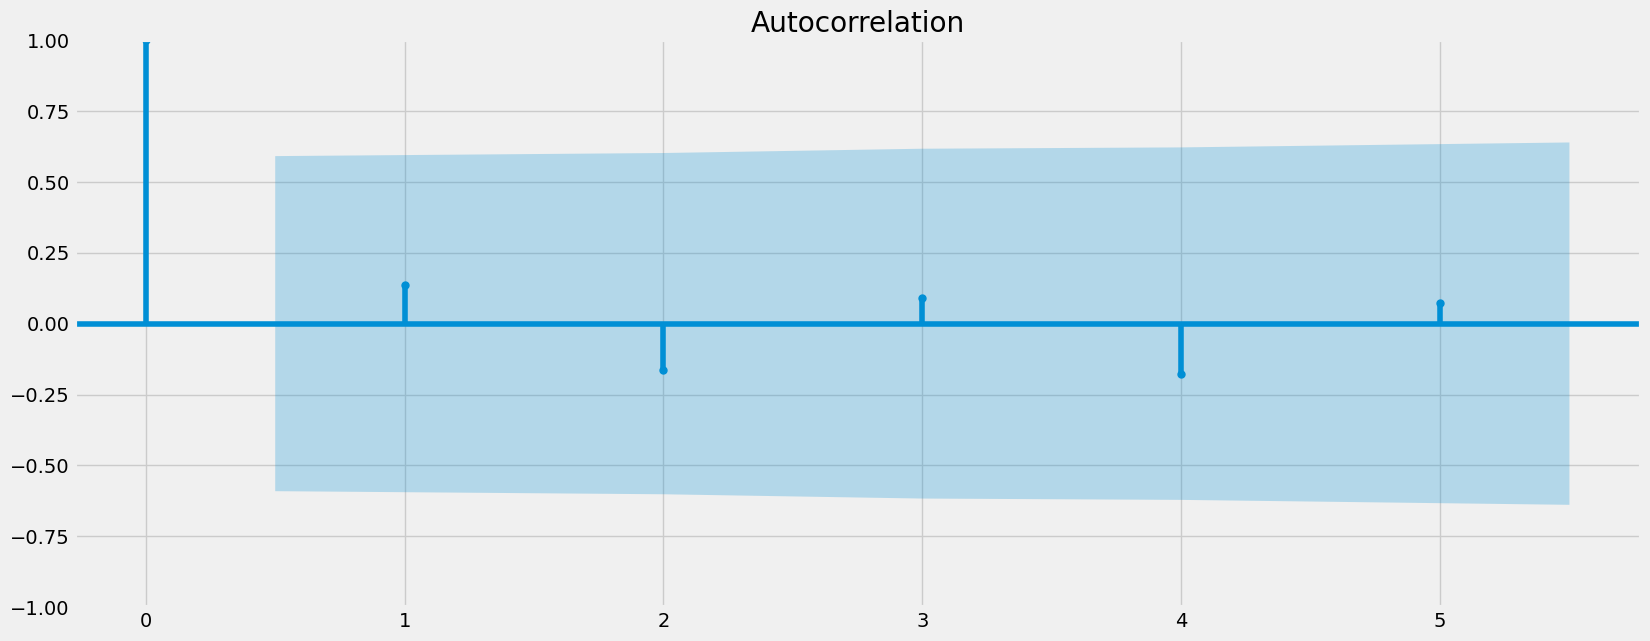

In [ ]:
# Check out a plot of autocorrelations

# This is an extra step to further confirm stationarity.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub)
plt.show()

**Interpretations**

We can see that the majority of lags in the series are in the blue area which represents the confidence interval (any lags outside of the blue area are significantly correlated with one another meaning that the data is non-stationary).

With the majority of lags within the blue area we can confidently say the data is stationary which supports the results of the Dickery-Fuller Test.